#### 유의확률

In [1]:
%matplotlib inline

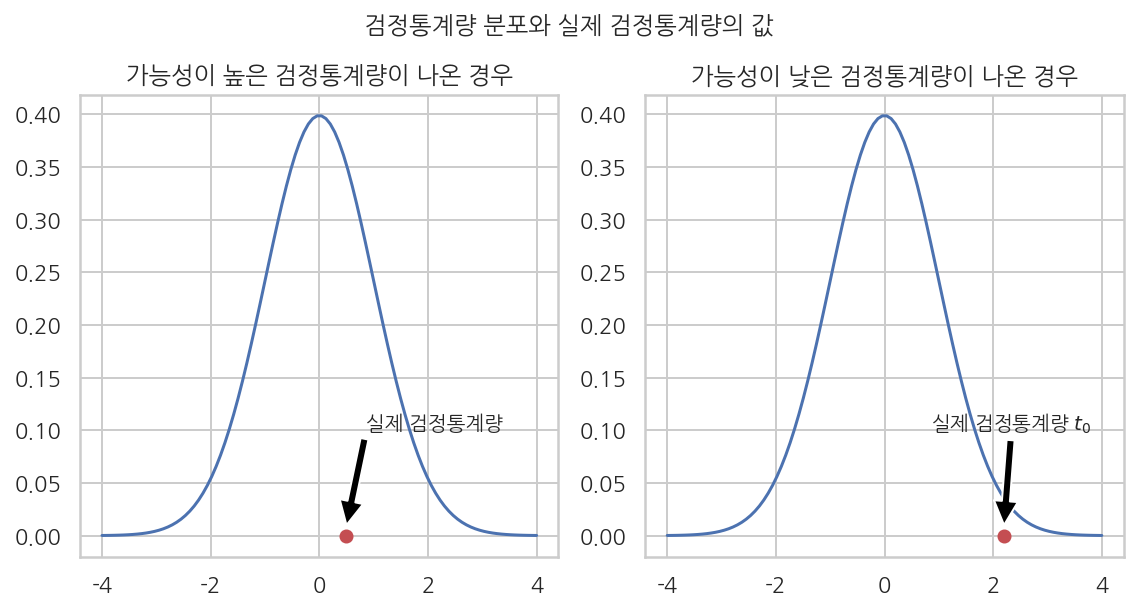

In [4]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4), facecolor = "1.")

plt.subplot(121)
plt.title("가능성이 높은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("가능성이 낮은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량의 값", y=1.05)
plt.tight_layout()
plt.show()

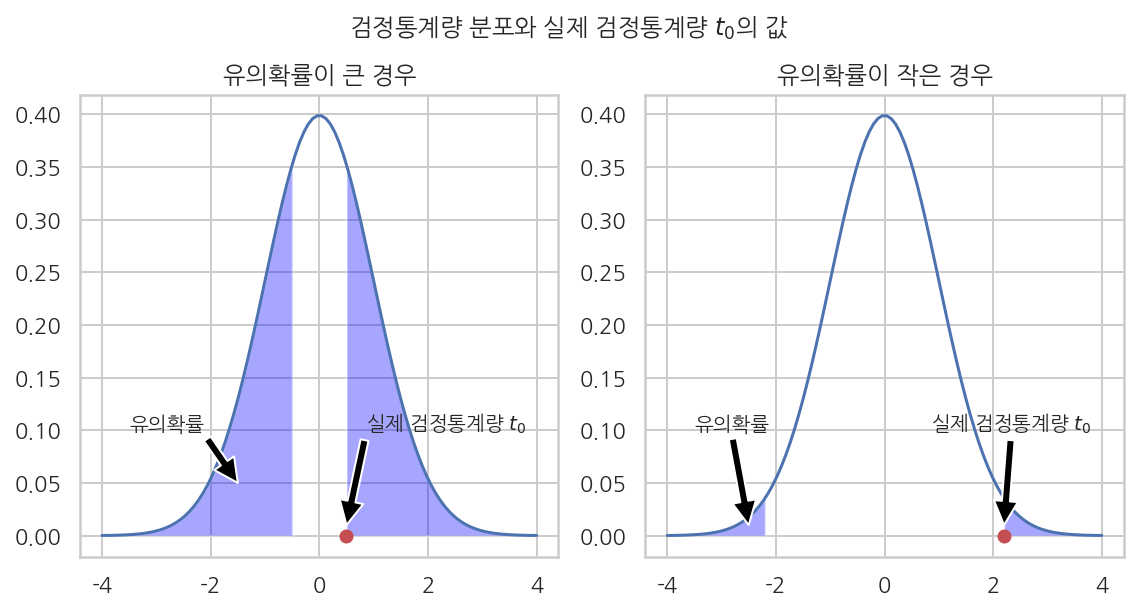

In [5]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4), facecolor = "1.")

plt.subplot(121)
plt.title("유의확률이 큰 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -0.5, 100)
xx3 = np.linspace(0.5, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-1.5, 0.05), xytext=(-3.5, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("유의확률이 작은 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -2.2, 100)
xx3 = np.linspace(2.2, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-2.5, 0.01), xytext=(-3.5, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량 $t_0$의 값", y=1.05)
plt.tight_layout()
plt.show()

#### 이항검정(binomail test)
- 이항분포를 이용하여 베르누이 확률변수의 모수에 대한 가설을 조사하는 검정 방법
- binom_test 사용
- 디폴트 귀무가설 = 0.5

In [10]:
N = 100
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [11]:
# 귀무가설을 기각할수 없다
sp.stats.binom_test(n, N)

0.9204107626128206

In [12]:
# 실제 모수가 0.35인 경우
N = 100
mu_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [13]:
# 귀무가설 = 0.5
sp.stats.binom_test(n, N)

0.00018314322488235352

In [16]:
# 연습문제 9.5.1
# N = 10이고 유의수준이 10%라면 앞면이 나온 횟수가 몇번이어야 동전이 공정하지 않을 수 있는가?
# 0, 1, 9, 10
N = 10
mu_0 = 0.8
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

8

In [18]:
for n in range(11):
    print(sp.stats.binom_test(n, N))

0.001953125
0.021484374999999997
0.10937500000000003
0.3437499999999999
0.7539062500000002
1.0
0.7539062500000002
0.3437499999999999
0.10937500000000003
0.021484374999999997
0.001953125


In [37]:
N1= 10
pvalues1 = np.array([sp.stats.binom_test(n, N1) for n in range(N1 + 1)])
fair_range1 = np.where([pvalues1 > 0.1])
fair_start1, fair_end1 = fair_range1[1][0], fair_range1[1][-1]

print('N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때'
      .format(N1, fair_start1, fair_end1))

N=10일 때 공정한 경우: 앞면이 나온 횟수가 2~8일 때


In [38]:
N2 = 1000
pvalues2 = np.array([sp.stats.binom_test(n, N2) for n in range(N2 + 1)])
fair_range2 = np.where([pvalues2 > 0.1])
fair_start2, fair_end2 = fair_range2[1][0], fair_range2[1][-1]

print('N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때'
      .format(N2, fair_start2, fair_end2))

N=1000일 때 공정한 경우: 앞면이 나온 횟수가 474~526일 때


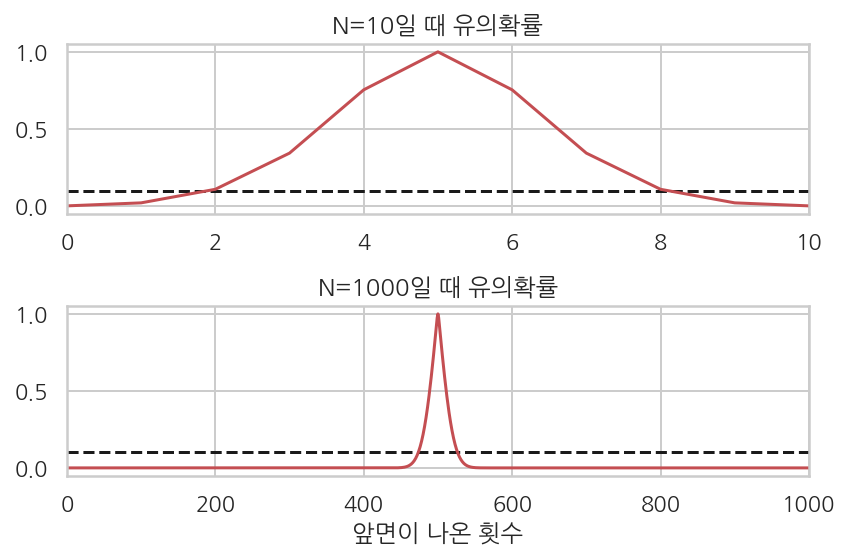

In [40]:
plt.figure(facecolor="1.")
plt.subplot(211)
plt.plot(pvalues1, "r-")
plt.hlines(y=0.1, xmin=0, xmax=N1 + 1, ls="--")
plt.xlim(0, N1)
plt.title("N={}일 때 유의확률".format(N1))
plt.subplot(212)
plt.plot(pvalues2, "r-")
plt.hlines(y=0.1, xmin=0, xmax=N2 + 1, ls="--")
plt.xlim(0, N2)
plt.title("N={}일 때 유의확률".format(N2))
plt.xlabel("앞면이 나온 횟수")
plt.tight_layout() 
plt.show()


#### 카이제곱 검정
- 범주형 확률분포의 모수에 대한 가설을 조사하는 검정 방법
- 카테고리분포 같은 경우 스칼라값이 나오는 식을 써야함

In [43]:
# scipy.stats.chisquare(f_obs, f_exp=None)
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [44]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [48]:
N = 100
K = 4
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11], dtype=int64)

In [49]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

In [50]:
# 연습문제 9.5.4
# 6면체 주사위를 5번 던져서 모두 6이 나왔을때 주사위가 공정하다는 귀무가설의 유의확률
sp.stats.chisquare(np.array([0, 0, 0, 0, 0, 5]))

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

In [51]:
# 연습문제 9.5.5
obs = np.array([[4, 16, 20], [23, 18, 19]])
result = sp.stats.chi2_contingency(obs)
print(result[1])

# 유의확률이 0.7% 이므로 귀무가설 기각
# 귀무가설 = 데이터 사이언스 스쿨 수업을 듣는 것이 학점과 상관이 없다 -> 기각
# 데이터 사이언스 스쿨 수업을 듣는 것이 학점과 상관이 있다

0.00704786570249751
